## Installation

In [81]:
! pip install pandas numpy matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import the libraries

In [82]:
import numpy as np
import pandas as pd


## Read the datasets

In [83]:
prediction_df = pd.read_csv("../data/predictions/model_predictions.csv")
prediction_df.head(3)

,Actual,Predicted,Model
0,193000,304466.666667,Decision Tree
1,160000,177812.728682,Decision Tree
2,165500,177812.728682,Decision Tree


In [84]:
print(prediction_df.groupby("Model").count())

                   Actual  Predicted
Model                               
Decision Tree         292        292
Lasso                 292        292
Linear Regression     292        292
Random Forest         292        292
Ridge                 292        292
XgBoost               292        292


In [85]:
xgboost_df = prediction_df[prediction_df.Model == 'XgBoost'].drop('Model',axis=1)
ranFor_df = prediction_df[prediction_df.Model == 'Random Forest'].drop('Model',axis=1)
decision_tree_df = prediction_df[prediction_df.Model == 'Decision Tree'].drop('Model',axis=1)
linear_regession_df = prediction_df[prediction_df.Model == 'Linear Regression'].drop('Model',axis=1)
lasso_df = prediction_df[prediction_df.Model == 'Lasso'].drop('Model',axis=1)
ridge_df = prediction_df[prediction_df.Model == 'Ridge'].drop('Model',axis=1)


In [86]:
actual_xgb = xgboost_df['Actual']
predictions_xgb = xgboost_df['Predicted']
actual_rf = ranFor_df['Actual']
predictions_rf = ranFor_df['Predicted']
actual_lasso = lasso_df['Actual']
predictions_lasso = lasso_df['Predicted']
actual_ridge = ridge_df['Actual']
predictions_ridge = ridge_df['Predicted']
actual_linear_regression = linear_regession_df['Actual']
predictions_linear_regression = linear_regession_df['Predicted']
actual_decision_tree = decision_tree_df['Actual']
predictions_decision_tree = decision_tree_df['Predicted']

## Compute RMSE

In [87]:
def rmse(actual, predictions):
    return np.sqrt(np.mean(np.square(actual - predictions)))

In [88]:
RMSE_xgb = rmse(actual_xgb,predictions_xgb)
RMSE_rf = rmse(actual_rf,predictions_rf)
RMSE_lasso = rmse(actual_lasso,predictions_lasso)
RMSE_ridge = rmse(actual_ridge,predictions_ridge)
RMSE_linear_regression = rmse(actual_linear_regression, predictions_linear_regression)
RMSE_decision_tree = rmse(actual_decision_tree,predictions_decision_tree )

In [89]:
print("XgBoost RMSE = " + str(RMSE_xgb))
print("Random Forest RMSE = " + str(RMSE_rf))
print("Lasso RMSE = " + str(RMSE_lasso))
print("Ridge RMSE = " + str(RMSE_ridge))
print("Linear Regression RMSE = " + str(RMSE_linear_regression))
print("Decision Tree RMSE = " + str(RMSE_ridge))

XgBoost RMSE = 42994.40262387001
Random Forest RMSE = 44604.725083619975
Lasso RMSE = 63793.75972198779
Ridge RMSE = 63884.87748290444
Linear Regression RMSE = 63932.89763656406
Decision Tree RMSE = 63884.87748290444


## Compute Mean Absolute Error

In [90]:
def mae(actual, predictions):
    return np.mean(np.abs(actual - predictions))

In [91]:
mae_xgb = mae(actual_xgb,predictions_xgb)
mae_rf = mae(actual_rf,predictions_rf)
mae_lasso = mae(actual_lasso,predictions_lasso)
mae_ridge = mae(actual_ridge,predictions_ridge)
mae_linear_regression = mae(actual_linear_regression, predictions_linear_regression)
mae_decision_tree = mae(actual_decision_tree,predictions_decision_tree )

In [92]:
print("XgBoost MAE = " + str(mae_xgb))
print("Random Forest MAE = " + str(mae_rf))
print("Lasso MAE = " + str(mae_lasso))
print("Ridge MAE = " + str(mae_ridge))
print("Linear Regression MAE = " + str(mae_linear_regression))
print("Decision Tree MAE = " + str(mae_decision_tree))

XgBoost MAE = 30381.486889982876
Random Forest MAE = 29551.679212328767
Lasso MAE = 38260.80630244674
Ridge MAE = 38358.12006129089
Linear Regression MAE = 38383.78489977965
Decision Tree MAE = 37142.007014673116


## Compute SMAPE

In [93]:
def smape(actual, predictions):
    return np.mean( np.abs(predictions - actual) / ((np.abs(predictions) + np.abs(actual))/2) )*100

In [94]:
smape_xgb = smape(actual_xgb,predictions_xgb)
smape_rf = smape(actual_rf,predictions_rf)
smape_lasso = smape(actual_lasso,predictions_lasso)
smape_ridge = smape(actual_ridge,predictions_ridge)
smape_linear_regression = smape(actual_linear_regression,predictions_linear_regression)
smape_decsion_tree = smape(actual_decision_tree,predictions_decision_tree)

In [95]:
print("XgBoost SMAPE = " + str(smape_xgb))
print("Random Forest SMAPE = " + str(smape_rf))
print("Lasso SMAPE = " + str(smape_lasso))
print("Ridge SMAPE = " + str(smape_ridge))
print("Linear Regression SMAPE = " + str(smape_linear_regression))
print("Decision Tree SMAPE = " + str(smape_decsion_tree))

XgBoost SMAPE = 17.653820901662357
Random Forest SMAPE = 16.77431126656171
Lasso SMAPE = 22.344868386604375
Ridge SMAPE = 22.407040588870196
Linear Regression SMAPE = 22.42862920421967
Decision Tree SMAPE = 19.693423588006954


## Compute MAPE

In [96]:
def mape(actual, predictions):
    return np.mean(np.abs(( actual - predictions) / actual)) * 100

In [97]:
mape_xgb = mape(actual_xgb,predictions_xgb)
mape_rf = mape(actual_rf,predictions_rf)
mape_lasso = mape(actual_lasso,predictions_lasso)
mape_ridge = mape(actual_ridge,predictions_ridge)
mape_linear_regression = mape(actual_linear_regression,predictions_linear_regression)
mape_decsion_tree = mape(actual_decision_tree,predictions_decision_tree)

In [98]:
print("XgBoost MAPE = " + str(mape_xgb))
print("Random Forest MAPE = " + str(mape_rf))
print("Lasso MAPE = " + str(mape_lasso))
print("Ridge MAPE = " + str(mape_ridge))
print("Linear Regression MAPE = " + str(mape_linear_regression))
print("Decision Tree MAPE = " + str(mape_decsion_tree))

XgBoost MAPE = 18.312402232540904
Random Forest MAPE = 17.49170045232112
Lasso MAPE = 23.195547753943057
Ridge MAPE = 23.2518751175454
Linear Regression MAPE = 23.268948469765085
Decision Tree MAPE = 20.930905151437145


## Plot graph

In [99]:
actual_xgb = xgboost_df['Actual']
predictions_xgb = xgboost_df['Predicted']
actual_rf = ranFor_df['Actual']
predictions_rf = ranFor_df['Predicted']
actual_lasso = lasso_df['Actual']
predictions_lasso = lasso_df['Predicted']
actual_ridge = ridge_df['Actual']
predictions_ridge = ridge_df['Predicted']

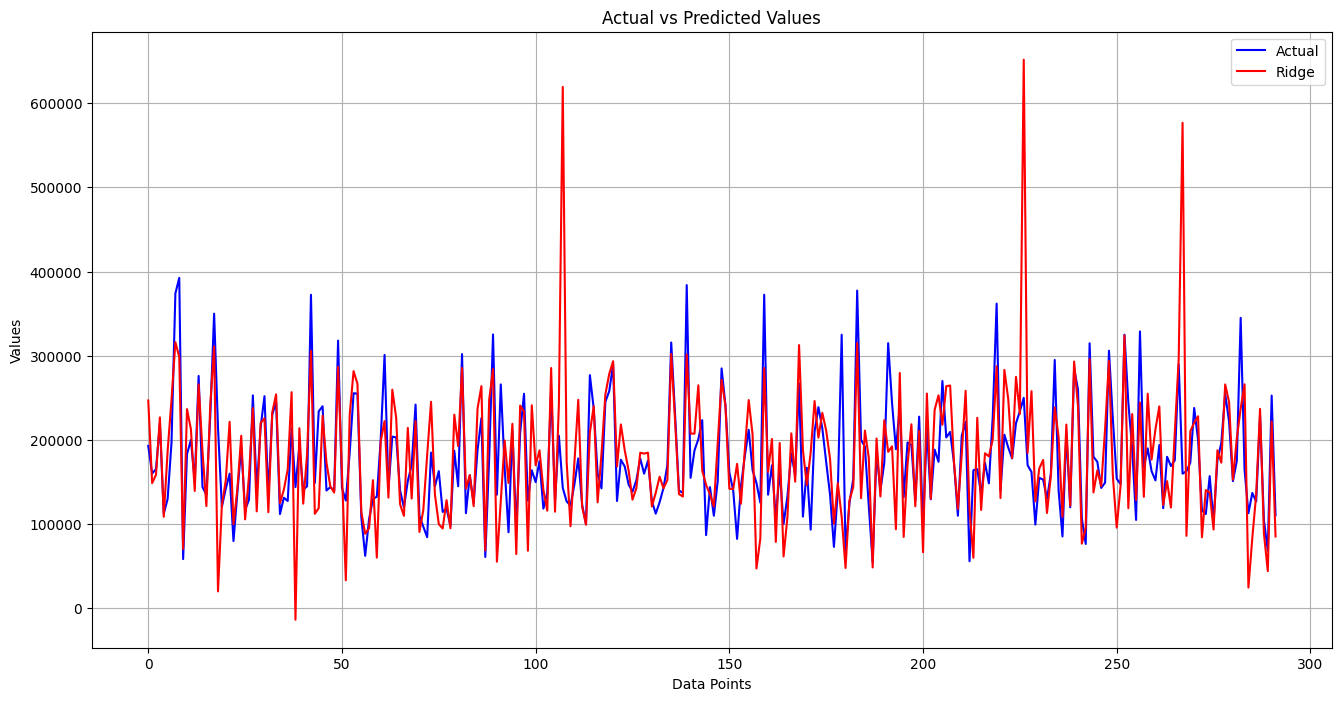

In [100]:
import matplotlib.pyplot as plt


# Plotting the line chart
indices = range(len(actual_xgb))

# Plotting the line chart
plt.figure(figsize=(16, 8))
plt.plot(indices, actual_xgb, linestyle='-', color='blue', label='Actual')
plt.plot(indices, predictions_ridge, linestyle='-', color='red', label='Ridge')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

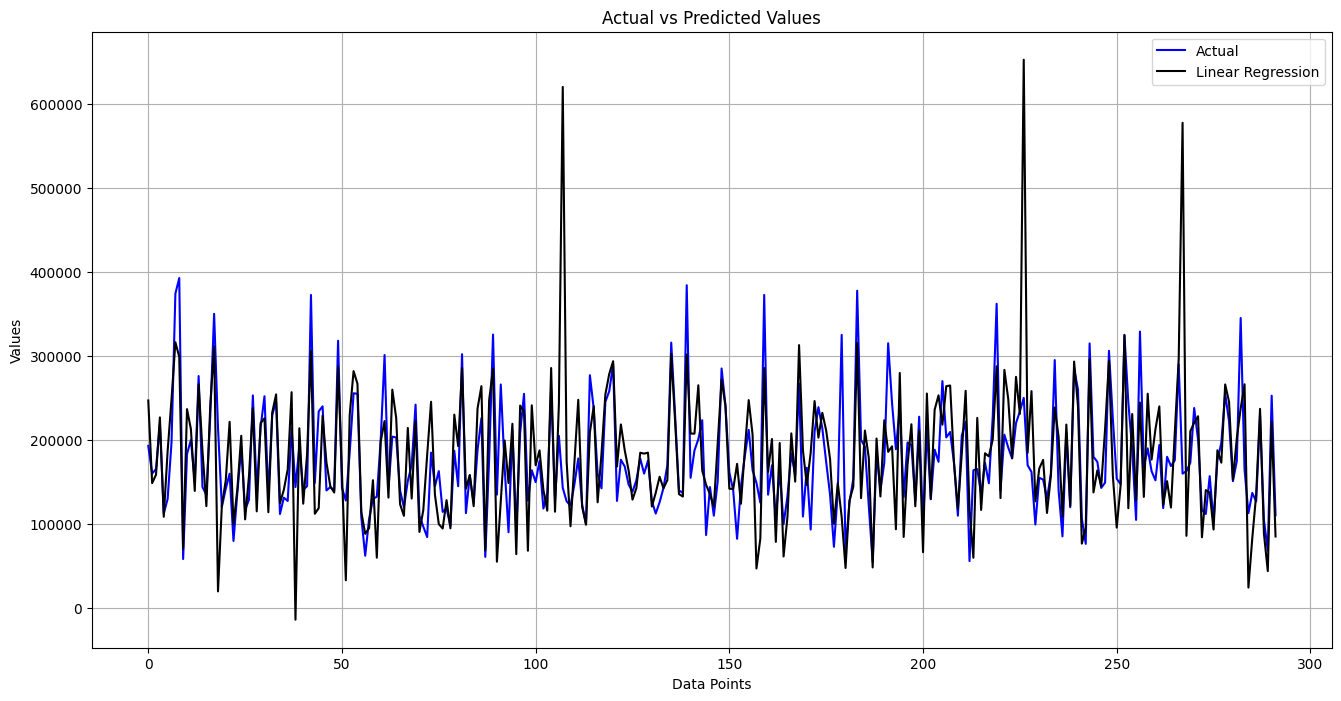

In [101]:
import matplotlib.pyplot as plt


# Plotting the line chart
indices = range(len(actual_xgb))

# Plotting the line chart
plt.figure(figsize=(16, 8))
plt.plot(indices, actual_xgb, linestyle='-', color='blue', label='Actual')
plt.plot(indices, predictions_linear_regression, linestyle='-', color='black', label='Linear Regression')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

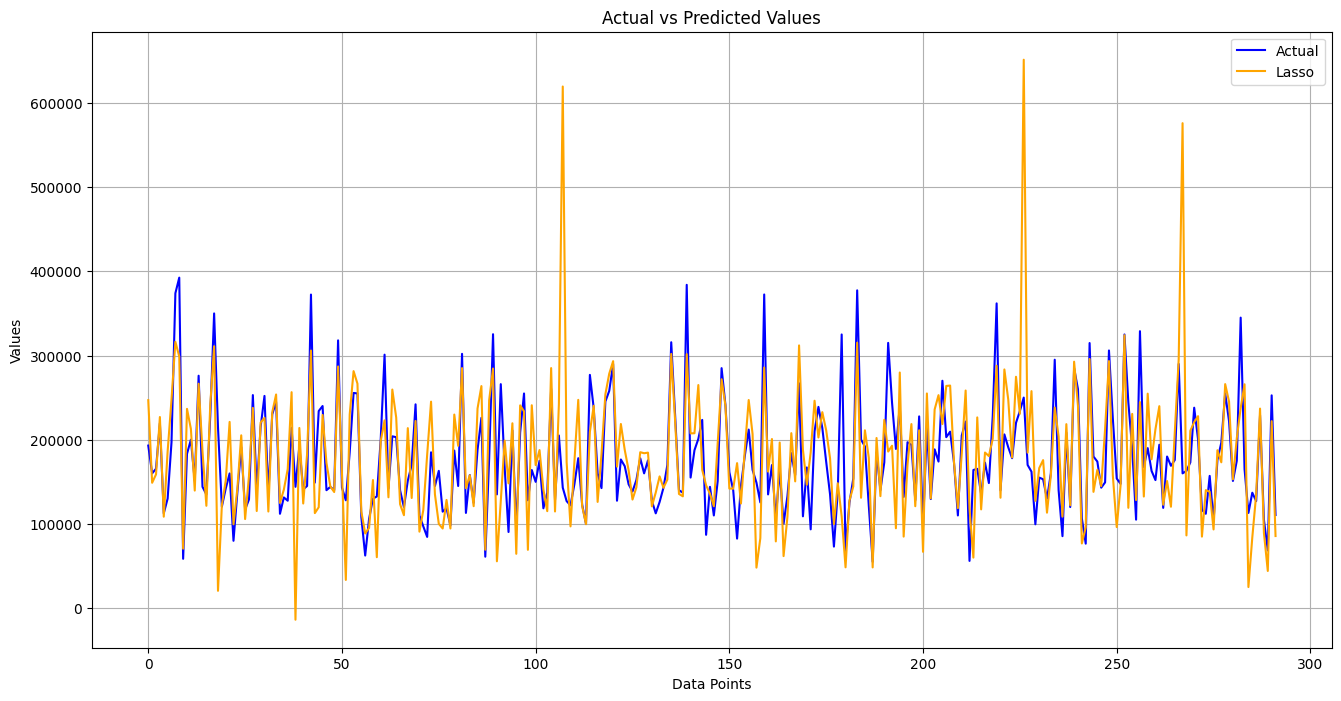

In [102]:
import matplotlib.pyplot as plt


# Plotting the line chart
indices = range(len(actual_xgb))

# Plotting the line chart
plt.figure(figsize=(16, 8))
plt.plot(indices, actual_xgb, linestyle='-', color='blue', label='Actual')
plt.plot(indices, predictions_lasso, linestyle='-', color='orange', label='Lasso')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

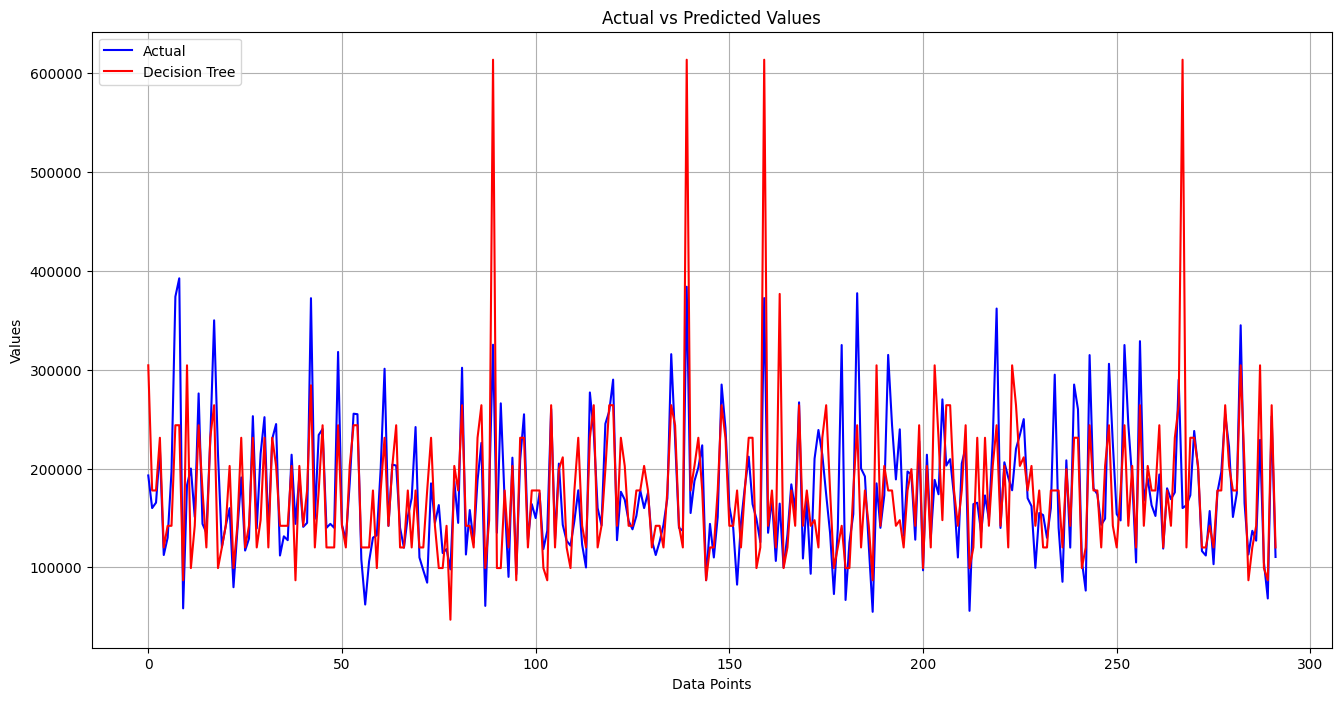

In [103]:
import matplotlib.pyplot as plt


# Plotting the line chart
indices = range(len(actual_xgb))

# Plotting the line chart
plt.figure(figsize=(16, 8))
plt.plot(indices, actual_xgb, linestyle='-', color='blue', label='Actual')
plt.plot(indices, predictions_decision_tree, linestyle='-', color='red', label='Decision Tree')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

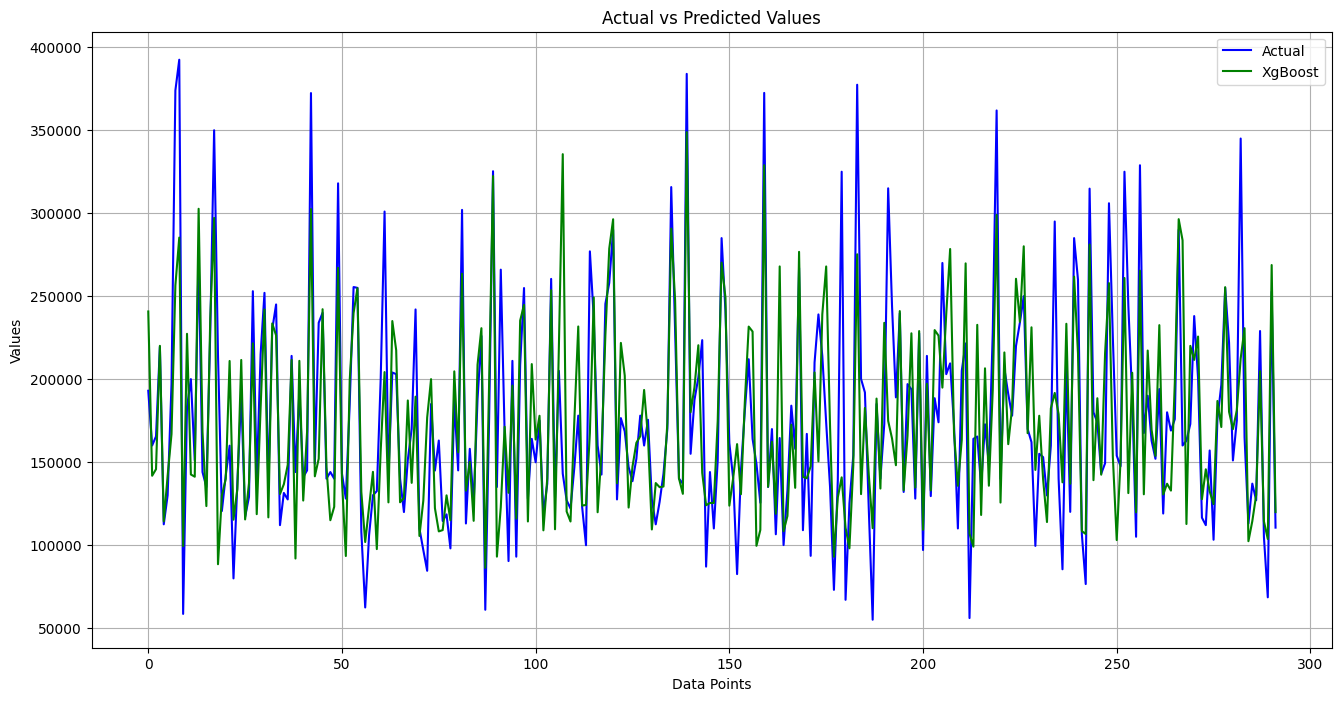

In [104]:
import matplotlib.pyplot as plt


# Plotting the line chart
indices = range(len(actual_xgb))

# Plotting the line chart
plt.figure(figsize=(16, 8))
plt.plot(indices, actual_xgb, linestyle='-', color='blue', label='Actual')
plt.plot(indices, predictions_xgb, linestyle='-', color='green', label='XgBoost')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

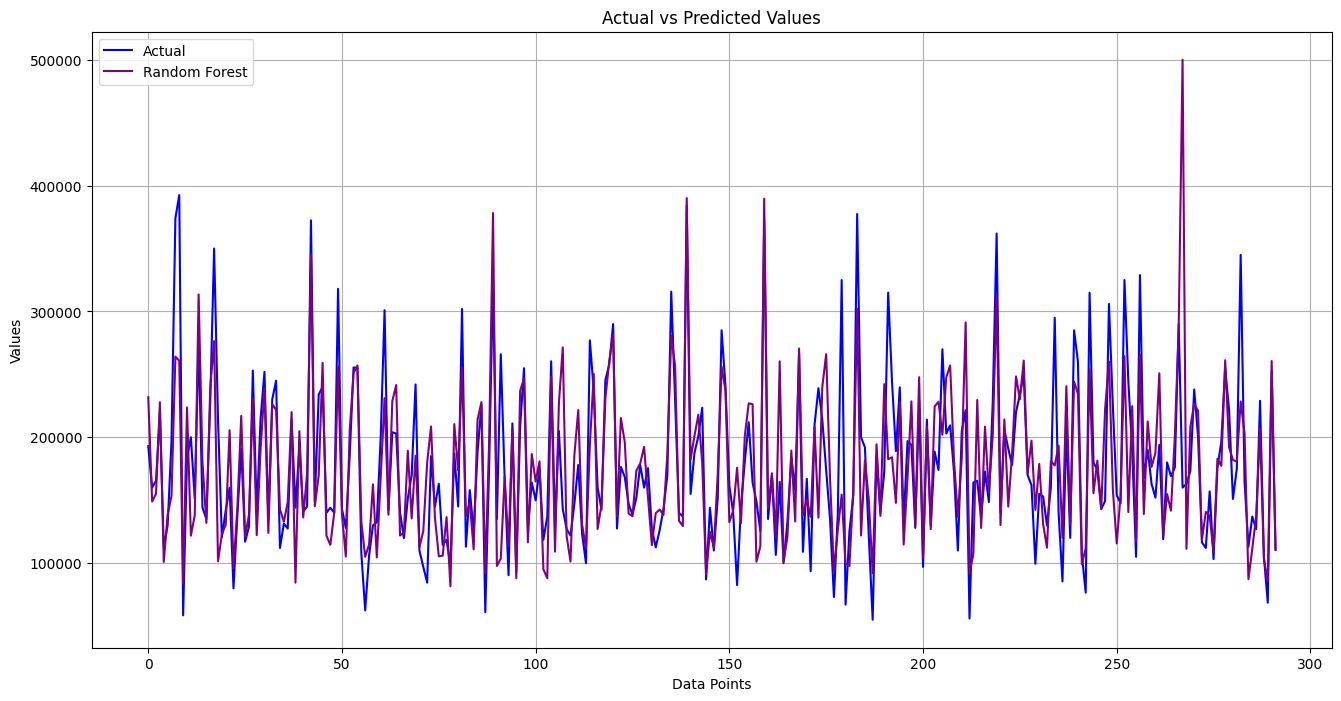

In [105]:
import matplotlib.pyplot as plt


# Plotting the line chart
indices = range(len(actual_xgb))

# Plotting the line chart
plt.figure(figsize=(16, 8))
plt.plot(indices, actual_xgb, linestyle='-', color='blue', label='Actual')
plt.plot(indices, predictions_rf, linestyle='-', color='purple', label='Random Forest')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()